In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle("../data/processed/fallas_cerradas_fibra_optica.pkl")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13386 entries, 1 to 1041
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_ticket                   13386 non-null  object        
 1   categoria                   13386 non-null  category      
 2   subcategoria                13386 non-null  category      
 3   inicio_falla                13386 non-null  datetime64[ns]
 4   cierre_falla                13386 non-null  datetime64[ns]
 5   tiempo_total                13386 non-null  float64       
 6   tg_region                   13386 non-null  category      
 7   direccion                   13386 non-null  object        
 8   abierto_por                 13386 non-null  object        
 9   fecha_asignacion            13386 non-null  datetime64[ns]
 10  equipo_asignado             13386 non-null  category      
 11  grupo_asignado              13386 non-null  category      
 

np.int64(8448)

In [5]:
q1 = df['tiempo_total'].quantile(0.25)
q2 = df['tiempo_total'].quantile(0.50)
q3 = df['tiempo_total'].quantile(0.75)

print(f"25% de los tickets fueron resueltos en: {q1:.2f} horas")
print(f"50% de los tickets fueron resueltos en: {q2:.2f} horas")
print(f"75% de los tickets fueron resueltos en: {q3:.2f} horas")

25% de los tickets fueron resueltos en: 6.16 horas
50% de los tickets fueron resueltos en: 8.73 horas
75% de los tickets fueron resueltos en: 13.07 horas


In [6]:
df.describe()

,inicio_falla,cierre_falla,tiempo_total,fecha_asignacion,fin_afectacion,tg_cantidad_dslam,tiempo_de_cierre,tg_cant_clientes_afectados,tg_cantidad_celdas
count,13386,13386,13386.000000,13386,13386,13386.000000,13386,13386.000000,13386.000000
mean,2024-01-10 23:51:17.669206784,2024-01-11 22:22:33.184894464,22.521181,2024-01-11 09:45:53.784775168,2024-01-11 20:49:39.772000768,0.129464,2024-01-11 08:30:58.897355520,37.283206,2.020245
min,2022-02-15 01:56:57,2022-02-15 14:56:15,0.820000,2022-02-15 02:11:16,2022-02-15 14:50:52,0.000000,2022-02-15 00:00:00,0.000000,0.000000
25%,2023-06-08 00:16:36,2023-06-08 11:24:17.500000,6.160000,2023-06-08 05:15:51.500000,2023-06-08 10:10:23.249999872,0.000000,2023-06-08 00:00:00,0.000000,0.000000
50%,2024-03-06 13:36:48,2024-03-08 00:25:35,8.730000,2024-03-06 22:08:28.500000,2024-03-07 17:26:09.500000,0.000000,2024-03-08 00:00:00,0.000000,0.000000
75%,2024-09-12 21:02:14,2024-09-13 16:57:05,13.070000,2024-09-12 21:16:04,2024-09-13 15:25:35,0.000000,2024-09-13 00:00:00,1.000000,1.000000
max,2025-07-15 13:21:57,2025-07-15 21:45:23,11780.240000,2025-07-15 13:34:29,2025-07-15 21:43:57,25.000000,2025-07-15 00:00:00,30219.000000,262.000000
std,NaN,NaN,205.541464,NaN,NaN,0.902602,NaN,524.146939,7.349321


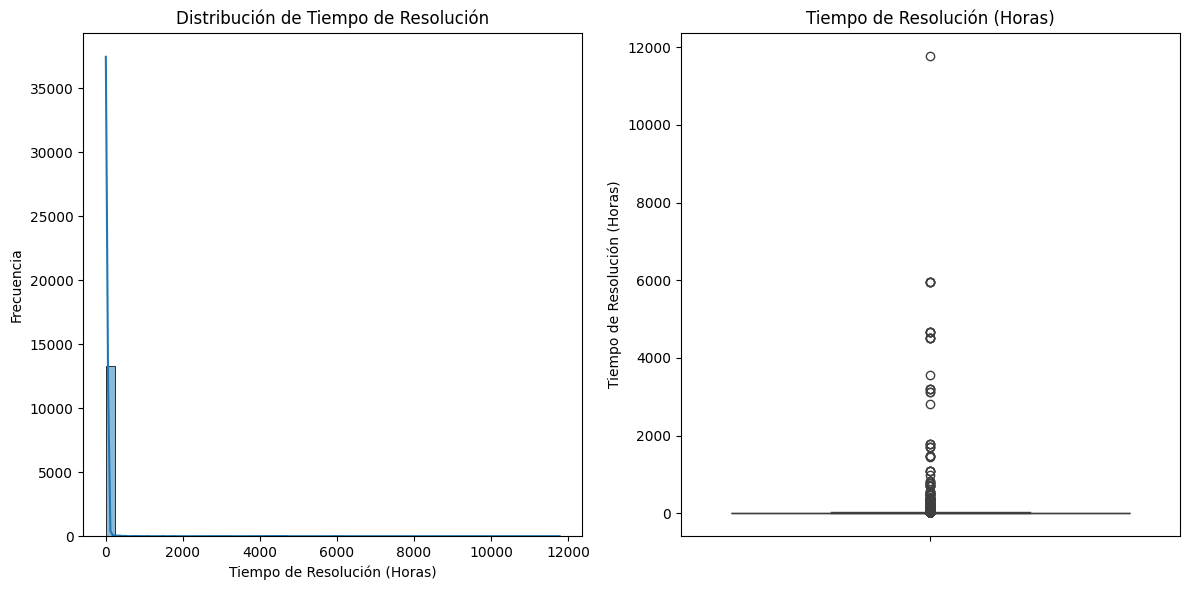

Tiempo de resolución promedio: 22.52 horas
Mediana de tiempo de resolución: 8.73 horas
Desviación estándar: 205.54 horas


In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='tiempo_total', bins=50, kde=True)
plt.title('Distribución de Tiempo de Resolución')
plt.xlabel('Tiempo de Resolución (Horas)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='tiempo_total')
plt.title('Tiempo de Resolución (Horas)')
plt.ylabel('Tiempo de Resolución (Horas)')

plt.tight_layout()
plt.show()

print(f"Tiempo de resolución promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Mediana de tiempo de resolución: {df['tiempo_total'].median():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")

In [8]:
print("=== Estadísticas de Tiempo de Resolución ===")
print(f"Min: {df['tiempo_total'].min():.2f} hours")
print(f"Max: {df['tiempo_total'].max():.2f} hours")
print(f"Promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Mediana: {df['tiempo_total'].median():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")
print()

print("=== PERCENTILES ===")
for p in [90, 95, 99, 99.5, 99.9]:
    value = df['tiempo_total'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f} hours")

print()
print("=== Outliers ===")
outliers = df[df['tiempo_total'] > 100]
print(f"Número de Tickets > 100 horas: {len(outliers)}")
if len(outliers) > 0:
    print("Casos extremos:")
    print(outliers[['id_ticket', 'tiempo_total', 'severidad', 'categoria']].head())

print()
print("=== Outliers Extremos > 1000 Horas ===")
extreme = df[df['tiempo_total'] > 1000]
print(f"Número de Tickets > 1000 horas: {len(extreme)}")
if len(extreme) > 0:
    print(extreme[['id_ticket', 'tiempo_total']].head())

=== Estadísticas de Tiempo de Resolución ===
Min: 0.82 hours
Max: 11780.24 hours
Promedio: 22.52 horas
Mediana: 8.73 horas
Desviación estándar: 205.54 horas

=== PERCENTILES ===
90th percentile: 20.59 hours
95th percentile: 28.40 hours
99th percentile: 126.12 hours
99.5th percentile: 360.47 hours
99.9th percentile: 3420.39 hours

=== Outliers ===
Número de Tickets > 100 horas: 159
Casos extremos:
     id_ticket  tiempo_total severidad    categoria
208   F4591908        194.25      Alta  TRANSMISION
875   F4504634        118.37   Critica        DATOS
1122  F4533892        281.91      Alta  TRANSMISION
1154  F4551166        341.38      Alta  TRANSMISION
1322  F4604590        111.19   Critica  TRANSMISION

=== Outliers Extremos > 1000 Horas ===
Número de Tickets > 1000 horas: 35
     id_ticket  tiempo_total
2175  F4622111       3119.41
2876  F5075687       1781.85
2894  F5169141       1707.44
3017  F5148855       3211.16
3518  F5296838       5943.68


In [9]:
extreme_case = df[df['tiempo_total'] == df['tiempo_total'].max()]
print("=== Caso Extremo ===")
print(extreme_case[['id_ticket', 'inicio_falla', 'cierre_falla', 'tiempo_total']].to_string())
print()

print("=== Análisis de Outliers ===")
thresholds = [48, 72, 168, 720, 1440]

for threshold in thresholds:
    count = len(df[df['tiempo_total'] > threshold])
    pct = (count / len(df)) * 100
    print(f"Tickets > {threshold} horas ({threshold/24:.1f} días): {count} ({pct:.1f}%)")

print()
print("=== RECOMENDACIONES ===")
print("Aproximaciones comunes:")
print("1. Cap at 99th percentile (máximo razonable)")
print("2. Cap at 30 days (720 horas) - límite operativo")
print("3. Eliminar tickets > 30 días como errores de datos")

p99 = df['tiempo_total'].quantile(0.99)
print(f"\n99th percentile: {p99:.2f} horas ({p99/24:.1f} días)")

reasonable_data = df[df['tiempo_total'] <= 720]
print(f"\nCon el filtro de 30 días ({len(reasonable_data)}/{len(df)} tickets):")
print(f"Promedio: {reasonable_data['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {reasonable_data['tiempo_total'].std():.2f} horas")

=== Caso Extremo ===
  id_ticket        inicio_falla        cierre_falla  tiempo_total
0  F5317831 2023-12-06 12:48:58 2025-04-10 09:03:07      11780.24

=== Análisis de Outliers ===
Tickets > 48 horas (2.0 días): 336 (2.5%)
Tickets > 72 horas (3.0 días): 231 (1.7%)
Tickets > 168 horas (7.0 días): 110 (0.8%)
Tickets > 720 horas (30.0 días): 42 (0.3%)
Tickets > 1440 horas (60.0 días): 31 (0.2%)

=== RECOMENDACIONES ===
Aproximaciones comunes:
1. Cap at 99th percentile (máximo razonable)
2. Cap at 30 days (720 horas) - límite operativo
3. Eliminar tickets > 30 días como errores de datos

99th percentile: 126.12 horas (5.3 días)

Con el filtro de 30 días (13344/13386 tickets):
Promedio: 13.41 horas
Desviación estándar: 29.37 horas


In [10]:
threshold = df['tiempo_total'].quantile(0.99)
print(f"99th percentile threshold: {threshold:.2f} hours ({threshold/24:.1f} days)")

df_filtered = df[df['tiempo_total'] <= threshold].copy()
outliers_removed = len(df) - len(df_filtered)

print(f"\nDataset comparison:")
print(f"Original dataset: {len(df):,} tickets")
print(f"Filtered dataset: {len(df_filtered):,} tickets")
print(f"Outliers removed: {outliers_removed} ({outliers_removed/len(df)*100:.1f}%)")

print(f"\nStatistics comparison:")
print("Original data:")
print(f"Promedio: {df['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {df['tiempo_total'].std():.2f} horas")
print(f"Mediana: {df['tiempo_total'].median():.2f} horas")

print("Filtered data (≤99th percentile):")
print(f"Promedio: {df_filtered['tiempo_total'].mean():.2f} horas")
print(f"Desviación estándar: {df_filtered['tiempo_total'].std():.2f} horas")
print(f"Mediana: {df_filtered['tiempo_total'].median():.2f} horas")

# Flag extreme outliers for investigation
extreme_outliers = df[df['tiempo_total'] > threshold]
if len(extreme_outliers) > 0:
    print(f"\nOutliers extremos marcados para investigación:")
    print(extreme_outliers[['id_ticket', 'tiempo_total', 'categoria', 'severidad']])

99th percentile threshold: 126.12 hours (5.3 days)

Dataset comparison:
Original dataset: 13,386 tickets
Filtered dataset: 13,252 tickets
Outliers removed: 134 (1.0%)

Statistics comparison:
Original data:
Promedio: 22.52 horas
Desviación estándar: 205.54 horas
Mediana: 8.73 horas
Filtered data (≤99th percentile):
Promedio: 11.41 horas
Desviación estándar: 10.69 horas
Mediana: 8.66 horas

Outliers extremos marcados para investigación:
     id_ticket  tiempo_total    categoria severidad
208   F4591908        194.25  TRANSMISION      Alta
1122  F4533892        281.91  TRANSMISION      Alta
1154  F4551166        341.38  TRANSMISION      Alta
2175  F4622111       3119.41    LOGISTICA     Media
2183  F4815047        841.46    LOGISTICA      Alta
...        ...           ...          ...       ...
761   F6094259        718.25        DATOS   Critica
815   F6112694        521.59  TRANSMISION     Media
852   F6125824        131.28        DATOS     Media
901   F6144320        189.65        DATOS

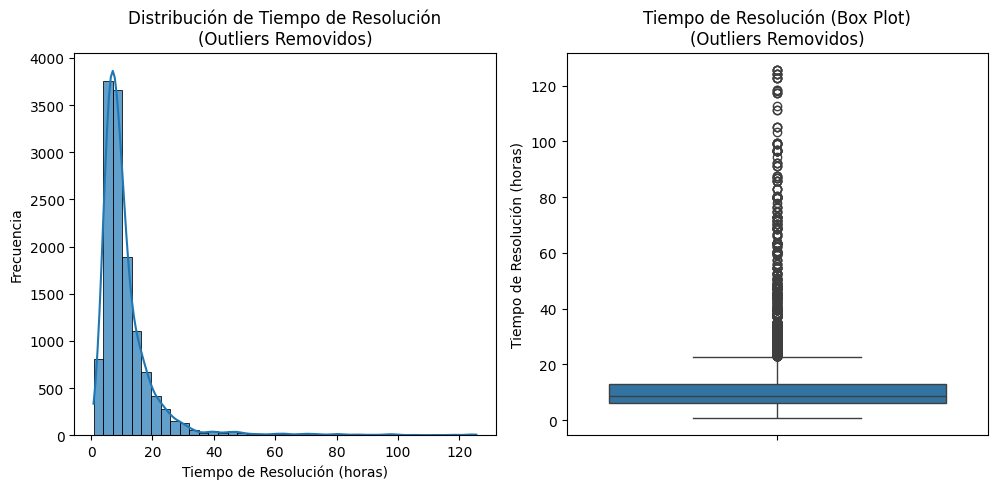

=== RESUMEN DE DATOS LIMPIOS ===
Promedio: 11.41 horas
Mediana: 8.66 horas
Moda: 5.67 horas
Desviación estándar: 10.69 horas
Rango: 0.82 - 125.58 horas


In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df_filtered, x='tiempo_total', bins=40, kde=True, alpha=0.7)
plt.title('Distribución de Tiempo de Resolución\n(Outliers Removidos)')
plt.xlabel('Tiempo de Resolución (horas)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_filtered, y='tiempo_total')
plt.title('Tiempo de Resolución (Box Plot)\n(Outliers Removidos)')
plt.ylabel('Tiempo de Resolución (horas)')

plt.tight_layout()
plt.show()

print("=== RESUMEN DE DATOS LIMPIOS ===")
print(f"Promedio: {df_filtered['tiempo_total'].mean():.2f} horas")
print(f"Mediana: {df_filtered['tiempo_total'].median():.2f} horas")
print(f"Moda: {df_filtered['tiempo_total'].mode().iloc[0]:.2f} horas")
print(f"Desviación estándar: {df_filtered['tiempo_total'].std():.2f} horas")
print(f"Rango: {df_filtered['tiempo_total'].min():.2f} - {df_filtered['tiempo_total'].max():.2f} horas")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/2385498490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Set2", order=categoria_counts.index)


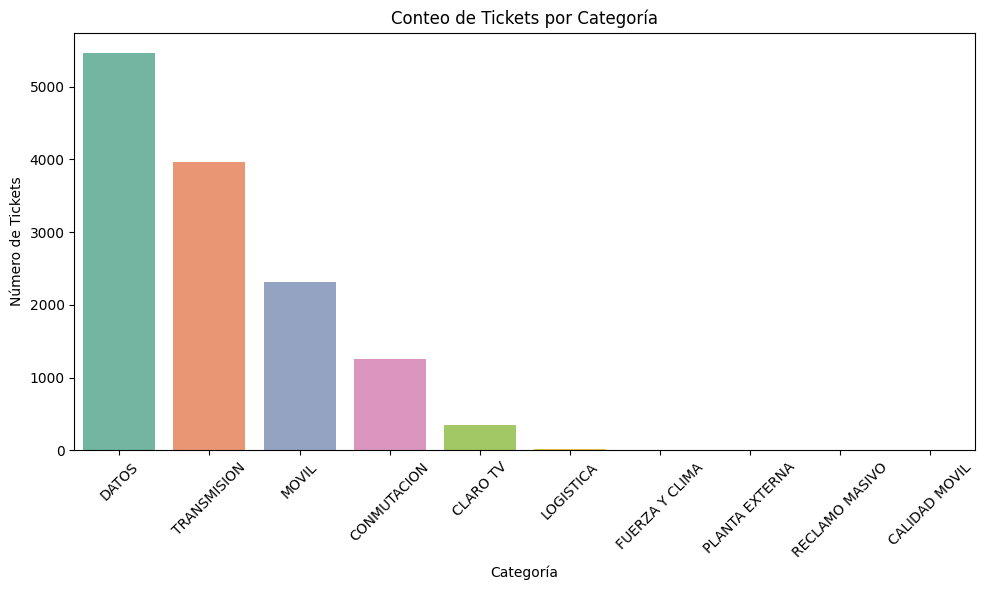

Conteo de Tickets por Categoría:
DATOS: 5,465 tickets (40.8%)
TRANSMISION: 3,964 tickets (29.6%)
MOVIL: 2,317 tickets (17.3%)
CONMUTACION: 1,256 tickets (9.4%)
CLARO TV: 348 tickets (2.6%)
LOGISTICA: 18 tickets (0.1%)
FUERZA Y CLIMA: 8 tickets (0.1%)
PLANTA EXTERNA: 5 tickets (0.0%)
RECLAMO MASIVO: 4 tickets (0.0%)
CALIDAD MOVIL: 1 tickets (0.0%)


In [12]:
plt.figure(figsize=(10, 6))
categoria_counts = df['categoria'].value_counts()
sns.barplot(x=categoria_counts.index, y=categoria_counts.values, palette="Set2", order=categoria_counts.index)
plt.title('Conteo de Tickets por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Tickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("Conteo de Tickets por Categoría:")
for cat, count in categoria_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{cat}: {count:,} tickets ({percentage:.1f}%)")

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1739985881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis", order=region_counts.index)


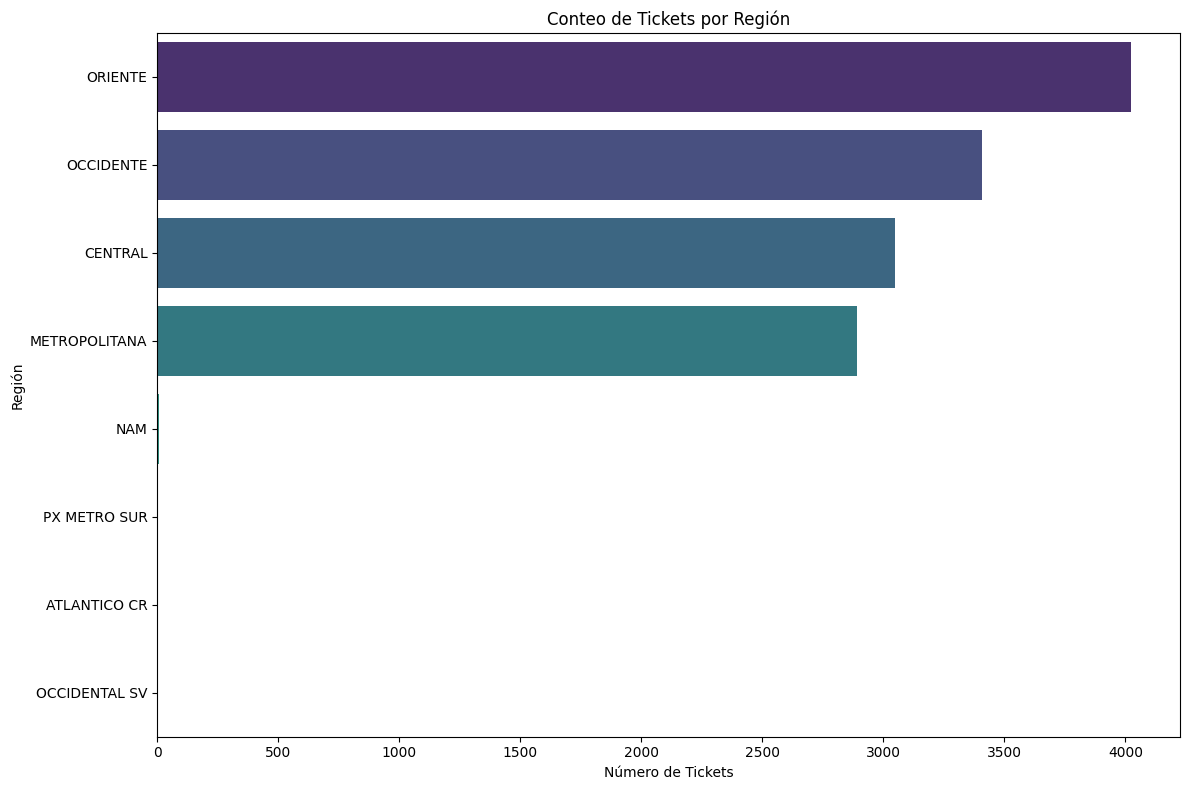

Conteo de Tickets por Región:
ORIENTE: 4,024 tickets (30.1%)
OCCIDENTE: 3,408 tickets (25.5%)
CENTRAL: 3,048 tickets (22.8%)
METROPOLITANA: 2,889 tickets (21.6%)
NAM: 8 tickets (0.1%)
PX METRO SUR: 4 tickets (0.0%)
ATLANTICO CR: 3 tickets (0.0%)
OCCIDENTAL SV: 2 tickets (0.0%)


In [13]:
plt.figure(figsize=(12, 8))
region_counts = df['tg_region'].value_counts()
sns.barplot(y=region_counts.index, x=region_counts.values, palette="viridis", order=region_counts.index)
plt.title('Conteo de Tickets por Región')
plt.xlabel('Número de Tickets')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

print("Conteo de Tickets por Región:")
for region, count in region_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{region}: {count:,} tickets ({percentage:.1f}%)")

Text(0.5, 1.0, 'Distribución de Tickets por Severidad')

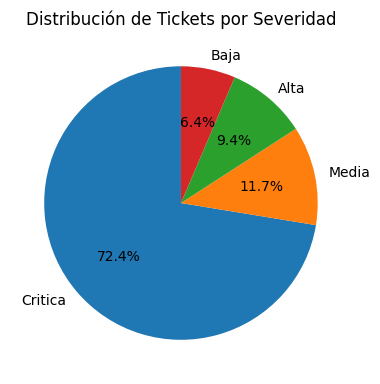

In [14]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 3, 1)
severidad_counts = df['severidad'].value_counts()
plt.pie(severidad_counts.values, labels=severidad_counts.index, 
autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Tickets por Severidad')


/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/3942080303.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3", order=top_groups.index)


Text(0, 0.5, 'Grupo de Resolución')

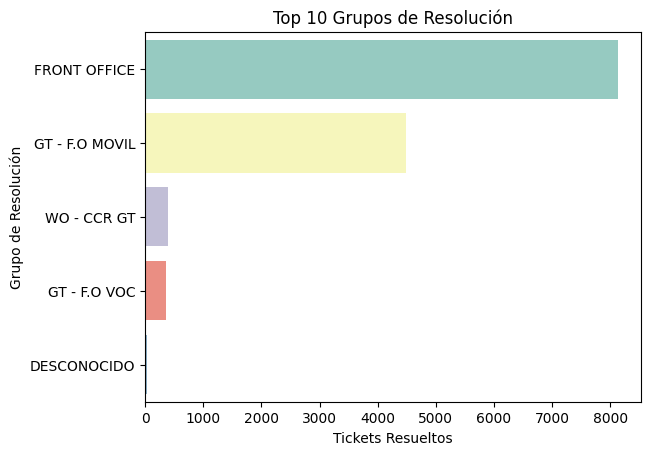

In [15]:
top_groups = df['grupo_que_resolvio'].value_counts().head(10)
sns.barplot(y=top_groups.index, x=top_groups.values, palette="Set3", order=top_groups.index)
plt.title('Top 10 Grupos de Resolución')
plt.xlabel('Tickets Resueltos')
plt.ylabel('Grupo de Resolución')

Text(0, 0.5, 'Número de Tickets')

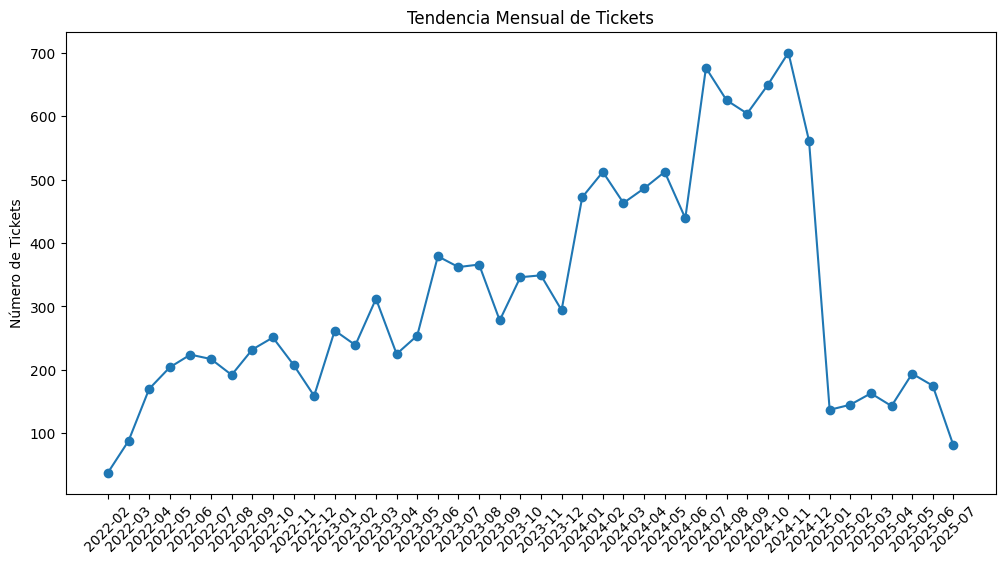

In [16]:
plt.figure(figsize=(12, 6))
df['month'] = df['inicio_falla'].dt.to_period('M')
monthly_counts = df.groupby('month').size()
plt.plot(monthly_counts.index.astype(str), monthly_counts.values, marker='o')
plt.title('Tendencia Mensual de Tickets')
plt.xticks(rotation=45)
plt.ylabel('Número de Tickets')

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  count_data = df.pivot_table(
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:31: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sev_cat_data = df.pivot_table(
/var/folders/kr/8nx03y

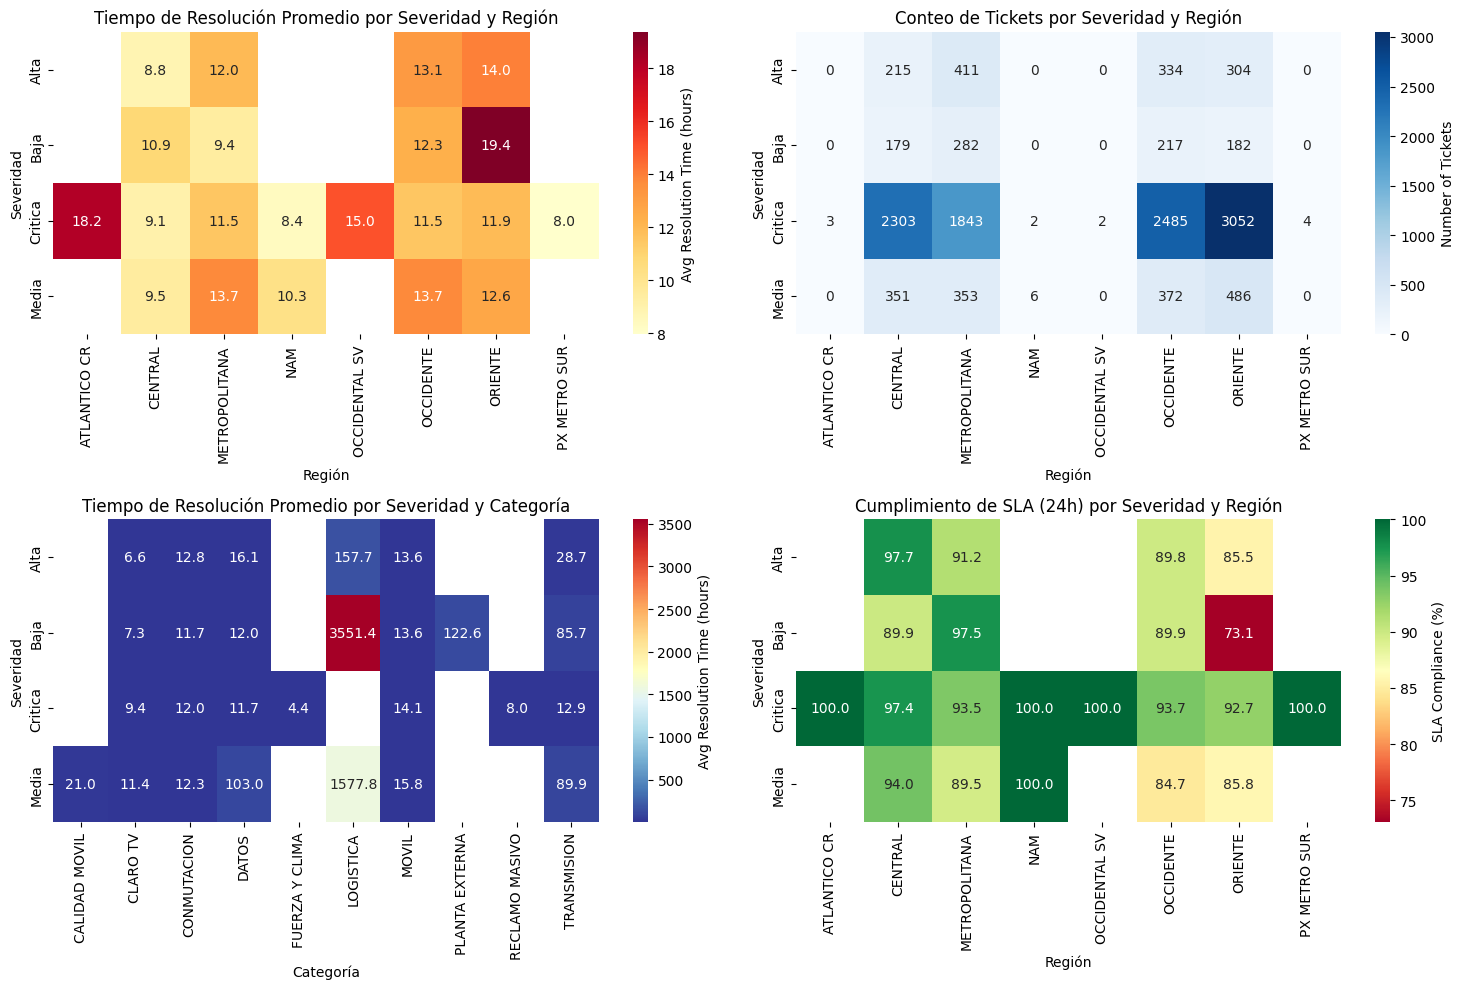

=== ANÁLISIS DE SEVERIDAD ===

Tiempo de Resolución Promedio por Severidad:
Alta: 12.21h avg, 9.10h median (1246 tickets)
Baja: 12.42h avg, 8.49h median (834 tickets)
Critica: 11.06h avg, 8.56h median (9656 tickets)
Media: 12.42h avg, 8.96h median (1516 tickets)

Cumplimiento de SLA por Severidad (% dentro de 24h):
Alta: 90.6%
Baja: 88.8%
Critica: 94.3%
Media: 88.3%


/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1892775833.py:67: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This beh

In [17]:
plt.figure(figsize=(15, 10))

heatmap_data = df_filtered.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='tg_region',
    aggfunc='mean'
)

plt.subplot(2, 2, 1)
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Tiempo de Resolución Promedio por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.subplot(2, 2, 2)
count_data = df.pivot_table(
    values='id_ticket',
    index='severidad',
    columns='tg_region',
    aggfunc='count'
)
sns.heatmap(count_data, annot=True, fmt='d', cmap='Blues',
            cbar_kws={'label': 'Number of Tickets'})
plt.title('Conteo de Tickets por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.subplot(2, 2, 3)
sev_cat_data = df.pivot_table(
    values='tiempo_total',
    index='severidad',
    columns='categoria',
    aggfunc='mean'
)
sns.heatmap(sev_cat_data, annot=True, fmt='.1f', cmap='RdYlBu_r',
            cbar_kws={'label': 'Avg Resolution Time (hours)'})
plt.title('Tiempo de Resolución Promedio por Severidad y Categoría')
plt.ylabel('Severidad')
plt.xlabel('Categoría')

# Subplot 4: SLA Compliance Heatmap (% within 24h)
plt.subplot(2, 2, 4)
sla_data = df.groupby(['severidad', 'tg_region']).apply(
    lambda x: (x['tiempo_total'] <= 24).mean() * 100
).unstack()
sns.heatmap(sla_data, annot=True, fmt='.1f', cmap='RdYlGn',
            cbar_kws={'label': 'SLA Compliance (%)'})
plt.title('Cumplimiento de SLA (24h) por Severidad y Región')
plt.ylabel('Severidad')
plt.xlabel('Región')

plt.tight_layout()
plt.show()

print("=== ANÁLISIS DE SEVERIDAD ===")
print("\nTiempo de Resolución Promedio por Severidad:")
severity_stats = df_filtered.groupby('severidad')['tiempo_total'].agg(['mean', 'median','count'])
for severity in severity_stats.index:
    mean_time = severity_stats.loc[severity, 'mean']
    median_time = severity_stats.loc[severity, 'median']
    count = severity_stats.loc[severity, 'count']
    print(f"{severity}: {mean_time:.2f}h avg, {median_time:.2f}h median ({count} tickets)")

print("\nCumplimiento de SLA por Severidad (% dentro de 24h):")
sla_by_severity = df.groupby('severidad').apply(lambda x:(x['tiempo_total'] <= 24).mean() * 100)
for severity, compliance in sla_by_severity.items():
    print(f"{severity}: {compliance:.1f}%")

In [18]:
df['month'] = df['inicio_falla'].dt.to_period('M')
df['week'] = df['inicio_falla'].dt.to_period('W')
df['day_of_week'] = df['inicio_falla'].dt.day_name()
df['hour'] = df['inicio_falla'].dt.hour

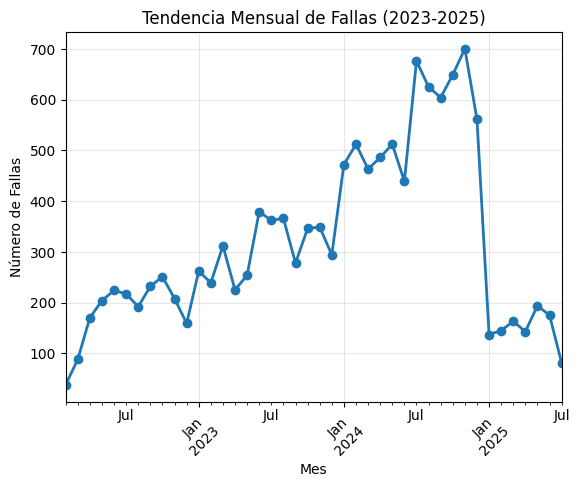

In [19]:
monthly_counts = df.groupby('month').size()
monthly_counts.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Tendencia Mensual de Fallas (2023-2025)')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/629708051.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

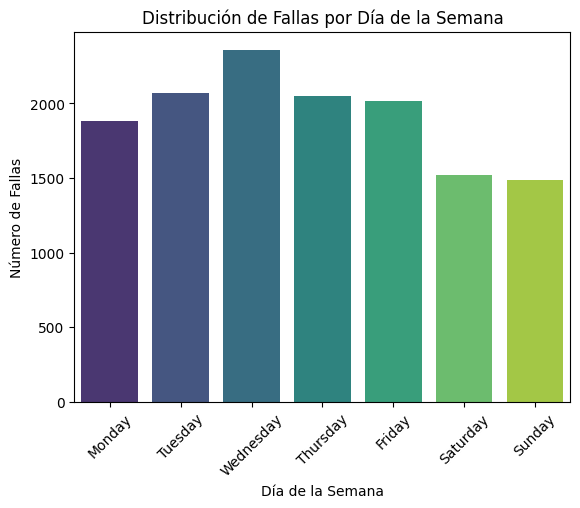

In [20]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_counts = df['day_of_week'].value_counts().reindex(day_order)
sns.barplot(x=dow_counts.index, y=dow_counts.values, palette='viridis')
plt.title('Distribución de Fallas por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Fallas')
plt.xticks(rotation=45)

(0.0, 23.0)

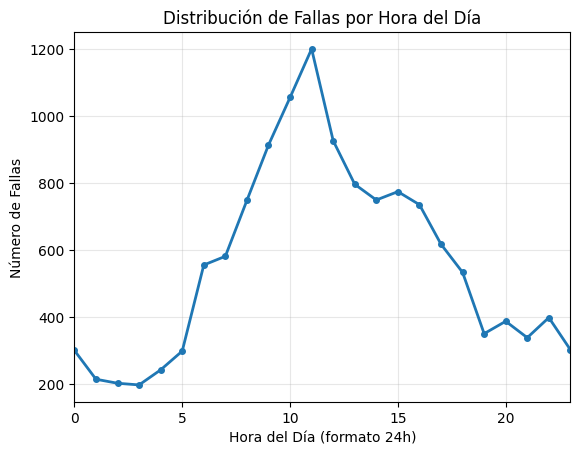

In [21]:
hourly_counts = df['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, marker='o',
linewidth=2, markersize=4)
plt.title('Distribución de Fallas por Hora del Día')
plt.xlabel('Hora del Día (formato 24h)')
plt.ylabel('Número de Fallas')
plt.grid(True, alpha=0.3)
plt.xlim(0, 23)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/3956806269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()


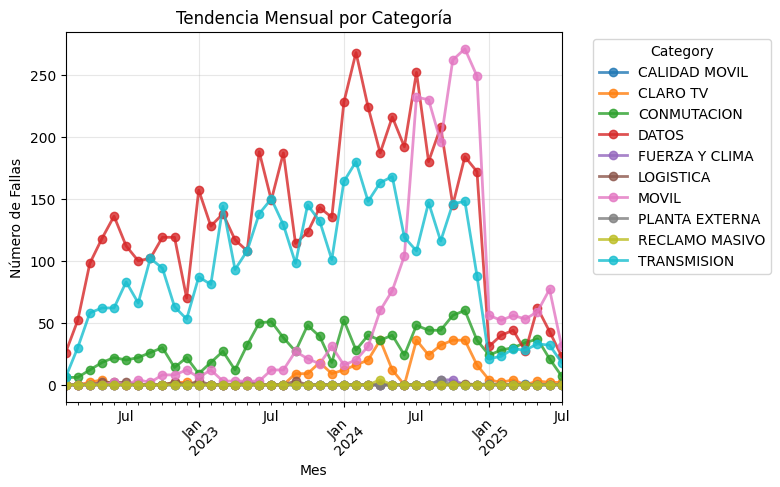

In [22]:
monthly_by_category = df.groupby(['month', 'categoria']).size().unstack()
monthly_by_category.plot(kind='line', marker='o', linewidth=2, alpha=0.8)
plt.title('Tendencia Mensual por Categoría')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

/var/folders/kr/8nx03y893f77pygs7pp4vrwm0000gp/T/ipykernel_74595/1750747897.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()


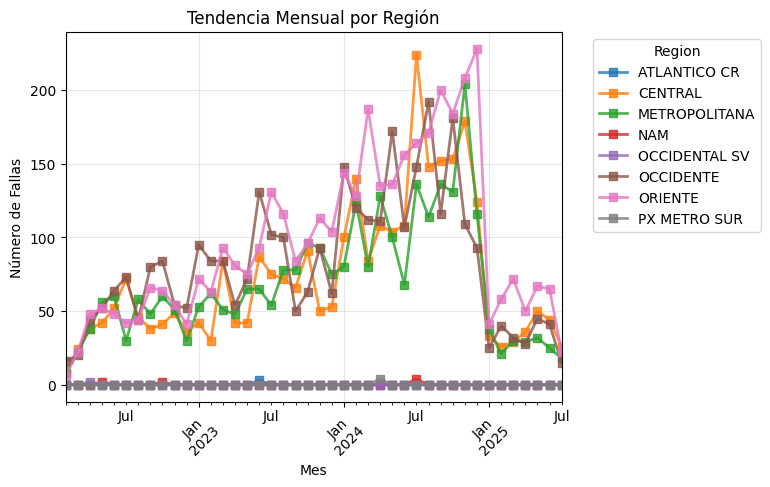

In [23]:
monthly_by_region = df.groupby(['month', 'tg_region']).size().unstack()
monthly_by_region.plot(kind='line', marker='s', linewidth=2, alpha=0.8)
plt.title('Tendencia Mensual por Región')
plt.xlabel('Mes')
plt.ylabel('Número de Fallas')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

In [24]:
print("\nEstadísticas Mensuales:")
print(f"Promedio de fallas por mes: {monthly_counts.mean():.1f}")
print(f"Mes con más fallas: {monthly_counts.idxmax()} ({monthly_counts.max()} fallas)")
print(f"Mes con menos fallas: {monthly_counts.idxmin()} ({monthly_counts.min()} fallas)")

print("\nPatrones de Día de la Semana:")
for day, count in dow_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{day}: {count} faults ({percentage:.1f}%)")

print("\nAnálisis de Horas Pico:")
top_hours = hourly_counts.nlargest(3)
for hour, count in top_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

print(f"\nHoras Quietas (3 más bajas):")
quiet_hours = hourly_counts.nsmallest(3)
for hour, count in quiet_hours.items():
    print(f"{hour:02d}:00 - {count} faults")

# Seasonal analysis
print("\nPatrones Estacionales:")
df['season'] = df['inicio_falla'].dt.month.map({
    12: 'Invierno', 1: 'Invierno', 2: 'Invierno',
    3: 'Primavera', 4: 'Primavera', 5: 'Primavera',
    6: 'Verano', 7: 'Verano', 8: 'Verano',
    9: 'Otoño', 10: 'Otoño', 11: 'Otoño'
})
seasonal_counts = df['season'].value_counts()
for season, count in seasonal_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{season}: {count} faults ({percentage:.1f}%)")


Estadísticas Mensuales:
Promedio de fallas por mes: 318.7
Mes con más fallas: 2024-11 (700 fallas)
Mes con menos fallas: 2022-02 (38 fallas)

Patrones de Día de la Semana:
Monday: 1884 faults (14.1%)
Tuesday: 2071 faults (15.5%)
Wednesday: 2359 faults (17.6%)
Thursday: 2048 faults (15.3%)
Friday: 2017 faults (15.1%)
Saturday: 1523 faults (11.4%)
Sunday: 1484 faults (11.1%)

Análisis de Horas Pico:
11:00 - 1199 faults
10:00 - 1054 faults
12:00 - 925 faults

Horas Quietas (3 más bajas):
03:00 - 196 faults
02:00 - 201 faults
01:00 - 213 faults

Patrones Estacionales:
Verano: 3736 faults (27.9%)
Otoño: 3617 faults (27.0%)
Primavera: 3214 faults (24.0%)
Invierno: 2819 faults (21.1%)


In [25]:
# Create training dataset without outliers
import os
import pandas as pd

# Load the original data
df = pd.read_pickle("/Users/jorgecontreras/Desktop/projects/claro-guatemala-analysis/data/processed/fallas_cerradas_fibra_optica.pkl")

# Apply 99th percentile threshold to remove extreme outliers
threshold = df['tiempo_total'].quantile(0.99)
training_dataset = df[df['tiempo_total'] <= threshold].copy()

print(f"=== TRAINING DATASET CREATION ===")
print(f"Original dataset: {len(df):,} tickets")
print(f"Training dataset: {len(training_dataset):,} tickets")
print(f"Outliers removed: {len(df) - len(training_dataset)} ({((len(df) - len(training_dataset))/len(df)*100):.1f}%)")
print(f"Threshold applied: {threshold:.2f} hours ({threshold/24:.1f} days)")

print(f"\n=== TRAINING DATASET STATISTICS ===")
print(f"Mean resolution time: {training_dataset['tiempo_total'].mean():.2f} hours")
print(f"Median resolution time: {training_dataset['tiempo_total'].median():.2f} hours") 
print(f"Standard deviation: {training_dataset['tiempo_total'].std():.2f} hours")
print(f"Min resolution time: {training_dataset['tiempo_total'].min():.2f} hours")
print(f"Max resolution time: {training_dataset['tiempo_total'].max():.2f} hours")

# Verify data quality
print(f"\n=== DATA QUALITY CHECK ===")
print(f"Missing values: {training_dataset.isnull().sum().sum()}")
print(f"Duplicate tickets: {training_dataset['id_ticket'].duplicated().sum()}")
print(f"Negative resolution times: {(training_dataset['tiempo_total'] < 0).sum()}")

# Save the training dataset
output_path = "/Users/jorgecontreras/Desktop/projects/claro-guatemala-analysis/data/processed/training_dataset_clean.pkl"
os.makedirs(os.path.dirname(output_path), exist_ok=True)
training_dataset.to_pickle(output_path)

print(f"\n=== DATASET SAVED ===")
print(f"Training dataset saved to: {output_path}")
print(f"File size: {len(training_dataset)} records")

=== TRAINING DATASET CREATION ===
Original dataset: 13,386 tickets
Training dataset: 13,252 tickets
Outliers removed: 134 (1.0%)
Threshold applied: 126.12 hours (5.3 days)

=== TRAINING DATASET STATISTICS ===
Mean resolution time: 11.41 hours
Median resolution time: 8.66 hours
Standard deviation: 10.69 hours
Min resolution time: 0.82 hours
Max resolution time: 125.58 hours

=== DATA QUALITY CHECK ===
Missing values: 0
Duplicate tickets: 8363
Negative resolution times: 0

=== DATASET SAVED ===
Training dataset saved to: /Users/jorgecontreras/Desktop/projects/claro-guatemala-analysis/data/processed/training_dataset_clean.pkl
File size: 13252 records
